## <b> Olivia's Notebook: Pittsburgh Public Schools Enrollment by Neighborhood 2020-21 School Year </b>
### Group 14
### ort13@pitt.edu

### <u> <b> Introduction:</b> </u>
* I chose to evaluate quantity and diversity in regards to student enrollment by neighborhood in Pittsburgh's public schools. It is critical for building a sense of community and youthfulness that there exists a large population of other K-12 students in the neighborhood where a family is placing its roots. Additionally, a diverse school environment will help to not only provide a greater overall cultural awareness/understanding for the family's children—promoting empathy and reducing prejudice—but it will also create a sense of comfort and culture for those students existing within each ethnicity group. 
    - The quantity factor will be assessed by combining the categorizations by grade level for each neighborhood and finding which neighborhood has the greatest total number of students enrolled.
    - The diversity factor will be assessed using the Simpson's Diversity Index, then subsequently ranking the neighborhoods from highest to lowest degree of diversification.
    - The point values will be divided in half in order to account fairly for both factors without further interrupting the degree of impact imposed upon the other metrics.

### <u> Total Enrollment Evaluation <u>

In [1]:
import numpy as np
import pandas as pd

#Read in the student enrollment data
school= pd.read_csv("enrollment.csv")

#Drop ethnicity-based data columns to focus on total student enrollment
student_enrollment = school.drop(columns=['african_american','american_indian','asian__not_pacific_islander', 
                    'hispanic','multiracial','native_hawaiian_or_other_pacific_islander', 'white'])


#Group rows of data pertaining to the same neighborhood together and sum their student enrollment totals
total_student_enrollment=student_enrollment.groupby(student_enrollment['neighborhood']).aggregate({'total_students_enrolled': 'sum'})

#Sort student enrollment totals by neighborhood from high to low
student_enrollment_rankings=total_student_enrollment.sort_values('total_students_enrolled', ascending=False)
print(student_enrollment_rankings.head(10))

                     total_students_enrolled
neighborhood                                
Carrick                               1276.0
Brookline                             1169.0
Beechview                              794.0
Sheraden                               694.0
Squirrel Hill South                    679.0
Knoxville                              616.0
Brighton Heights                       598.0
Homewood North                         589.0
East Hills                             569.0
Hazelwood                              567.0


Ranked above are the top ten neighborhoods in terms of total student enrollment. I am choosing to proceed with evaluating only these neighborhoods in the second half of my evaluation (diversity) to ensure that the winning neighborhood within my metric is well-rounded in both aspects.

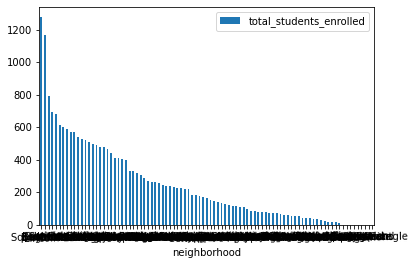

In [2]:
#Create bar graph of student enrollment by neighborhood
student_enrollment_rankings.plot.bar(x=None,y='total_students_enrolled',rot=1)

This representation is a bit ugly and cluttered due to the overlapping axis labels. Regardless, it works alongside the ordered dataframe to demonstrate that one neighborhood stands out above the rest.. Carrick has the  highest total number of students enrolled out of all the neighborhoods surveyed. It is closely followed by Brookline and Beechview. All of these neighborhoods are geographically located south of central Pittsburgh, across the Monongahela River.

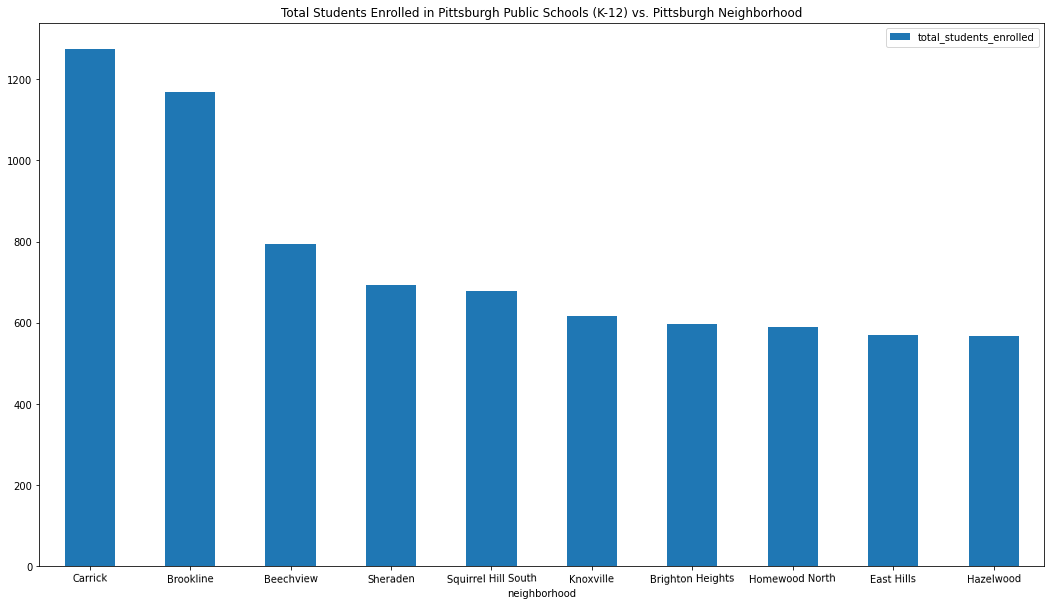

In [8]:
#Create a new dataframe of just the top ten neighborhoods
highest_student_enrollments= student_enrollment_rankings.head(10)

#Display more narrowed-down bar graph of student enrollment by neighborhood
highest_student_enrollments.plot.bar(figsize=(18,10), x=None, y='total_students_enrolled',rot=1, title="Total Students Enrolled in Pittsburgh Public Schools (K-12) vs. Pittsburgh Neighborhood")

The adapted bar graph is much more readable for the user. This plot continues to demonstrate that the Carrick neighborhood carries the highest public school student enrollment (K-12) in Pittsburgh. Carrick will receive 1.5 points, Brookline will receive 1 point, and Beechview will receive 0.5 points.

### _Scoring_:

- Beechview (+0.5)= 0.5 * 1.5 = <b> 0.75 </b>
- Brookline (+1) = 1 * 1.5 = <b> 1.5 </b>
- Carrick (+1.5) = 1.5 * 1.5 = <b> 2.25 </b>

In [12]:
#Put the scores into a dataframe for possible future reference
scores= pd.DataFrame(
            {"Points": [0.75, 1.5, 2.25]},
    index= ["Beechview", "Brookline", "Carrick"])

#Rank the neighborhoods from highest to lowest point value
scores.sort_values('Points', ascending=False)

,Points
Carrick,2.25
Brookline,1.50
Beechview,0.75


### <u> Diversity Evaluation <u>

The diversity of a neighborhood will be evaluated using the <b> _Simpson's Diversity Index_ </b>, which is often used in measuring biodiversity.

The index will utilize the following formula to generate values representative of the level of each neighborhood's diversification:

### D = 1 - [ Σn(n-1) / N(N-1) ]

Where:
* D = Simpson's Diversity Index level
* n = # of students per respective ethnicity per respective neighborhood 
* N = total # of students in respective neighborhood

Values closer to 0 indicate a lesser degree of diversity within a neighborhood, whereas neighborhoods with values closer to 1 are more diverse.

In [13]:
#Remove irrelevant columns (in regards to diversity)
school_clean=school.drop(columns=['student_count_redactions','grade_level','attending_feeder','attending_nonfeeder','total_with_feeder_status','feeder_count_redactions','american_indian','native_hawaiian_or_other_pacific_islander'])


#Group data from the same neighborhood together (disregard grade level distinctions)
diversity_totals=school_clean.groupby(school_clean['neighborhood']).aggregate({'total_students_enrolled': 'sum','african_american':'sum','asian__not_pacific_islander':
                                                                        'sum','hispanic':'sum','multiracial':'sum','white':'sum'}) 

#Create a new dataframe that represents the diversity data of the ten neighborhoods with top student enrollment totals
diversity_totals_by_enrollment=diversity_totals.sort_values('total_students_enrolled', ascending=False)

#Add a new "other/unknown" column for students whose ethnicities are unaccounted for
diversity_totals_by_enrollment['other/unknown'] = 2*diversity_totals_by_enrollment['total_students_enrolled'] - diversity_totals_by_enrollment.sum(axis=1)
diversity_totals_by_enrollment.head(10)

#Create a new dataframe to index values meausuring degree of diversity by neighborhood 
diversity_index=diversity_totals_by_enrollment.copy()

#Determine the product of (# students per ethnicity per neighborhood) * (# students per ethnicity per neighborhood-1)
diversity_index['AA Value']= (diversity_index['african_american'] * (diversity_index['african_american']-1))
diversity_index['ANPI Value']= (diversity_index['asian__not_pacific_islander'] * (diversity_index['asian__not_pacific_islander']-1)) 
diversity_index['HIS Value']= (diversity_index['hispanic'] * (diversity_index['hispanic']-1)) 
diversity_index['MULT Value']= (diversity_index['multiracial'] * (diversity_index['multiracial']-1)) 
diversity_index['WHITE Value']= (diversity_index['white'] * (diversity_index['white']-1)) 


#Determine the product of (total # students per neighborhood) * (total # students per neighborhood-1)
diversity_index['Tot Enroll x (Tot Enroll-1)']= diversity_index['total_students_enrolled'] * (diversity_index['total_students_enrolled'] -1)


#Use the Simpson's Diversity Index equation to create a column with each neighborhood's diversity level
diversity_index['Diversity Level']= 1- (diversity_index.iloc[:,7:12].sum(axis=1) / diversity_index['Tot Enroll x (Tot Enroll-1)'])


#Make a new dataframe that only includes only the ten neighborhoods from the total student enrollment analysis
shrink=diversity_index.head(10)

#Sort neighborhoods from highest to lowest diversity level
shrink.sort_values('Diversity Level',ascending=False)

,total_students_enrolled,african_american,asian__not_pacific_islander,hispanic,multiracial,white,other/unknown,AA Value,ANPI Value,HIS Value,MULT Value,WHITE Value,Tot Enroll x (Tot Enroll-1),Diversity Level
neighborhood,,,,,,,,,,,,,,
Beechview,794.0,187.0,0.0,177.0,81.0,326.0,23.0,34782.0,-0.0,31152.0,6480.0,105950.0,629642.0,0.716722
Carrick,1276.0,362.0,157.0,37.0,156.0,546.0,18.0,130682.0,24492.0,1332.0,24180.0,297570.0,1626900.0,0.706032
Brighton Heights,598.0,314.0,0.0,0.0,65.0,185.0,34.0,98282.0,-0.0,-0.0,4160.0,34040.0,357006.0,0.617704
Knoxville,616.0,394.0,0.0,24.0,64.0,96.0,38.0,154842.0,-0.0,552.0,4032.0,9120.0,378840.0,0.555100
Brookline,1169.0,153.0,33.0,63.0,131.0,758.0,31.0,23256.0,1056.0,3906.0,17030.0,573806.0,1365392.0,0.546611
Squirrel Hill South,679.0,40.0,77.0,14.0,61.0,446.0,41.0,1560.0,5852.0,182.0,3660.0,198470.0,460362.0,0.544437
Hazelwood,567.0,390.0,0.0,0.0,23.0,120.0,34.0,151710.0,-0.0,-0.0,506.0,14280.0,320922.0,0.481195
Sheraden,694.0,490.0,0.0,0.0,89.0,75.0,40.0,239610.0,-0.0,-0.0,7832.0,5550.0,480942.0,0.473966
Homewood North,589.0,551.0,0.0,0.0,11.0,0.0,27.0,303050.0,-0.0,-0.0,110.0,-0.0,346332.0,0.124655


## &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  Diversity in Pittsburgh's Public Schools

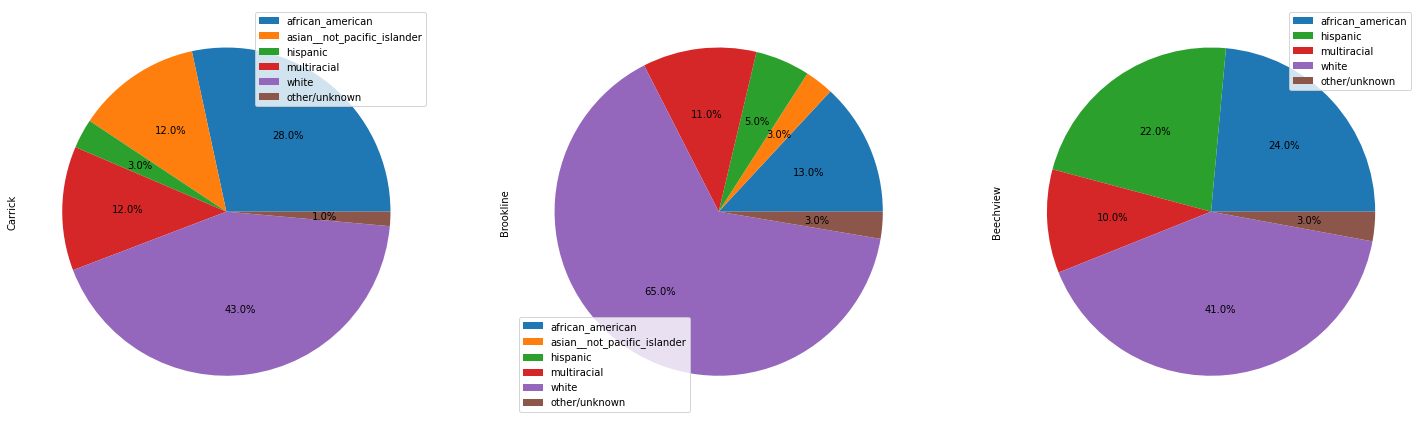

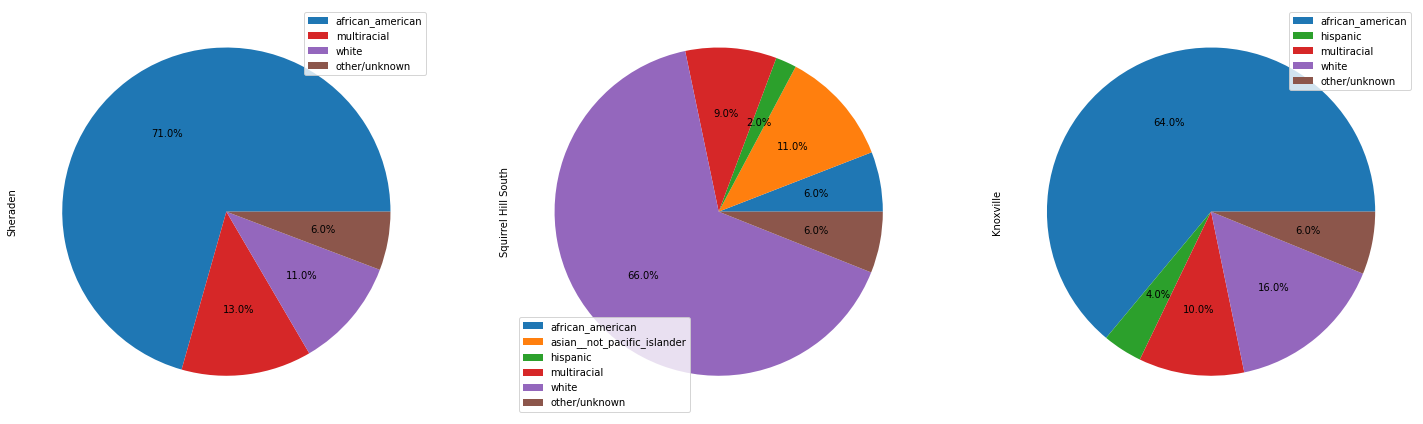

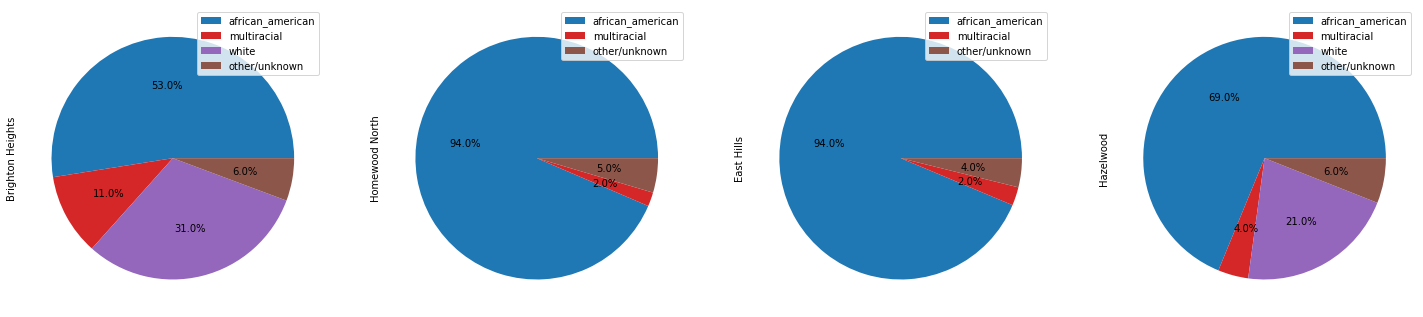

In [14]:
#Create a new dataframe with swapped x and y axes in order to make pie chart formation easier
diversity_pie_data=diversity_totals_by_enrollment.swapaxes("index","columns").iloc[1:,0:10]

#Display pie charts of each neighborhood's diversity breakdown (organized in three rows)
pies_row1 = diversity_pie_data.iloc[:,0:3].plot.pie(subplots=True, figsize=(25, 25),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',labeldistance=None)
pies_row2 = diversity_pie_data.iloc[:,3:6].plot.pie(subplots=True, figsize=(25, 25),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',labeldistance=None)
pies_row3 = diversity_pie_data.iloc[:,6:10].plot.pie(subplots=True, figsize=(25, 25),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',labeldistance=None)


Because Beechview had the greatest diversity level (~0.7167) according to Simpson's Diversity Index, it comes out as the most diverse neighborhood in Pittsburgh (under the established constraint of also having a high total student enrollment). Carrick was close behind with a diversity level of ~0.7060 and Brighton Heights took third place with a level of ~0.6177. 

### <u> <b> Olivia's Conclusion: </b> </u>

Since Carrick has the greatest total student enrollment and also gathered the second-most amount of points during the diversity evaluation, it seems to take the cake for being the best neighborhood to raise a healthy and comfortable family within the context of the metric. Carrick's respective pie chart shows that there is no ethnic supermajority in its student population (simply a plurality), demonstrating a significant degree of spread diversification. The chart also includes a pie slice from each one of the ethnicities surveyed, so the neighborhood does not lack total representation for any one group. 

Beechview was a very close runner-up with the third highest total student enrollment and the overall most diverse atmosphere. Raising children within a diverse environment is crucial because it allows for their exposure to a wide variety of different cultures and ethnicities. Experiences like this at a young age tend to help expand cultural consciousness, increase unity, and reduce negative racial/ethnic biases. 

In either of these neighborhoods, a family's children are bound to be surrounded by lots of other young students from all different backgrounds, which is very beneficial for building a strong sense of a youthful and diverse community.

### _Notable mentions_: 
* Beechview had the greatest Hispanic student population out of all the neighborhoods surveyed.
* Carrick, Brookline, and Squirrel Hill South were the only neighborhoods of those surveyed which included members of every ethnicity group. 
* Although the greatest fraction of Carrick's and Beechview's student populations were white, the white population did not hold a supermajority over the other ethnicity groups.
* The neighborhoods of Sheraden, Knoxville, Brighton Heights, Homewood North, East Hills, and Hazelwood all showed majority African-American student populations.

### _Updated Scoring_:


- Beechview (+1.5)= 0.5 + 1.5 * 1.5 = <b> 2.75 </b>
- Brighton Heights (+0.5)= 0.5 * 1.5 = <b> 0.75 </b>
- Brookline (+0)= <b> 1 </b>
- Carrick (+1) = 1.5 + 1 * 1.5 = <b> 3 </b>

In [15]:
#Rewrite over the scores dataframe with updated point values
scores= pd.DataFrame(
            {"Points": [2.75, 0.75, 1, 3]},
    index= ["Beechview", "Brighton Heights", "Brookline", "Carrick"])

#Rank neighborhoods from highest to lowest point values
scores.sort_values('Points', ascending=False)

,Points
Carrick,3.00
Beechview,2.75
Brookline,1.00
Brighton Heights,0.75
